<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 1</p><br>

## 1. **Extracting twitter data:** In this problem we would like to extract data from twitter.

a. **Twitter API:** Set up twitter API using any of the methods as mentioned in the class.

In [2]:
# TODO

b. Now search twitter messages for "data science job". Display few job informations.

In [3]:
# TODO

c. Search 300 tweets using the hash tag `#chess` and save them in an object called `rTweets`. Show the top 7 sources of tweets (such as android or iphone) in a ordered bar plot.

In [4]:
# TODO

d. Convert rTweets into a data frame and store it in an object called dTweets. Display some data from dTweets.

In [5]:
# TODO 

e. dTweets has a column showing the time the tweet was created. Generate a plot showing number of tweets on each of the hours.

In [6]:
# TODO

f. Arrange the dataframe dTweets based on the retweetCount. While doing this select only columns text, screenName, retweetCount. Store the data in a object called mostTweets. Display five texts that are most retweeted.

In [8]:
# TODO

g. Generate a bar chart showing top 15 screen names and count of retweets from mostTweets. Order the bars based on the retweet counts.

In [9]:
# TODO

## 2. **Working with databases:** Please follow the instruction below before answering the questions:
* Import the sqlite3
* Connect to titanic.db

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("titanic.db")
curs = conn.cursor()
curs.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(curs.fetchall())

[('titanic',)]


In [3]:
q='SELECT * FROM titanic'
df = pd.read_sql_query(q, conn)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,ageint
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,**EMPTY**,S,2,0,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,**EMPTY**,S,1,0,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,2,0,None
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,**EMPTY**,S,1,0,None


a. What is the average age of passengers who survived? Group the data by Sex. Display only the column `Sex`, `AverageAge`

In [4]:
q="SELECT avg(age) FROM titanic WHERE Survived=1"
curs.execute(q)
curs.fetchall()

[(28.19329861111111,)]

In [37]:
curs.execute("SELECT Sex,AVG(Age) FROM titanic GROUP BY Sex")
curs.fetchall()

[('female', 27.745173745173744), ('male', 30.72664459161148)]

In [35]:
df['Age'] = pd.to_numeric(df['Age'])
df[df['Survived']=='1']['Age'].mean()
df.groupby('Sex').Age.mean()


Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64

b. What is the percentage of passengers who survived in each Passenger Class or `Pclass`? Group the data by `Sex`. Display Pclass, Sex, percentage value. 

In [55]:
curs.execute("SELECT Pclass,count(Survived)*100/sum(count(Survived)) over() FROM titanic GROUP BY Pclass")
curs.fetchall()

[('1', 24), ('2', 20), ('3', 55)]

In [58]:
##plz explain Over?
##column name
##PErcent format

In [57]:
curs.execute("SELECT Pclass,Sex,count(Survived)*100/sum(count(Survived)) over() FROM titanic GROUP BY Pclass,Sex")
curs.fetchall()

[('1', 'female', 10),
 ('1', 'male', 13),
 ('2', 'female', 8),
 ('2', 'male', 12),
 ('3', 'female', 16),
 ('3', 'male', 39)]

In [42]:
df.groupby(['Pclass','Sex']).Survived.count()/df.Pclass.count()


Pclass  Sex   
1       female    0.103487
        male      0.137233
2       female    0.085489
        male      0.121485
3       female    0.161980
        male      0.390326
Name: Survived, dtype: float64

c. What is the average age of all the passenger (survived and not survived)? Group the data by `Pclass`, `Sex`, `Survived`. After that use `seaborn` to generate a line plot to show average age vs pclass, facet by sex and color it by survived.

In [ ]:
curs.execute("DELETE FROM titanic WHERE age IS NULL")
conn.commit()

In [13]:
curs.execute("update titanic set age2=age")
conn.commit()

In [33]:
curs.execute("SELECT avg(age2) FROM titanic")
curs.fetchall()

[(29.64209269662921,)]

In [47]:
curs.execute("SELECT Pclass, Sex, Survived,avg(age2) FROM titanic group by Pclass, Sex, Survived")
mydata=curs.fetchall()
(mydata)

[('1', 'female', '0', 25.666666666666668),
 ('1', 'female', '1', 34.5625),
 ('1', 'male', '0', 44.58196721311475),
 ('1', 'male', '1', 36.248000000000005),
 ('2', 'female', '0', 36.0),
 ('2', 'female', '1', 28.080882352941178),
 ('2', 'male', '0', 33.36904761904762),
 ('2', 'male', '1', 16.022),
 ('3', 'female', '0', 23.818181818181817),
 ('3', 'female', '1', 19.329787234042552),
 ('3', 'male', '0', 27.25581395348837),
 ('3', 'male', '1', 22.274210526315787)]

In [41]:
import seaborn as sns

In [49]:
df = pd.DataFrame(mydata,columns=['pclass','sex','survived','age'])
df

,pclass,sex,survived,age
0,1,female,0,25.666667
1,1,female,1,34.562500
2,1,male,0,44.581967
3,1,male,1,36.248000
4,2,female,0,36.000000
5,2,female,1,28.080882
6,2,male,0,33.369048
7,2,male,1,16.022000
8,3,female,0,23.818182
9,3,female,1,19.329787


Text(0.5, 1.0, 'Average age vs pclass, facet by sex and color it by survived')

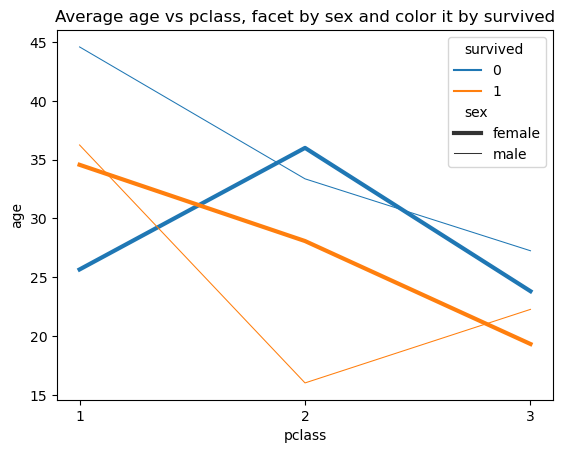

In [64]:
ax=sns.lineplot(df, x=df.pclass,y=df.age , size=df.sex , hue=df.survived)
ax.set_title('Average age vs pclass, facet by sex and color it by survived')

d. What is the name, age, sex and pclass of the 5 oldest and 5 youngest persons who died?

In [30]:
q='SELECT * FROM titanic'
df = pd.read_sql_query(q, conn)
df2=df[df['Survived']=='0'].sort_values(by=['age2'])
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,age2
131,165,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,**EMPTY**,S,6,0,1.0
308,387,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9,**EMPTY**,S,8,0,1.0
507,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2,3,2,347088,27.9,**EMPTY**,S,6,0,2.0
162,206,0,3,"Strom, Miss. Telma Matilda",female,2,0,1,347054,10.4625,G6,S,2,0,2.0
239,298,0,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,4,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,673,0,2,"Mitchell, Mr. Henry Michael",male,70,0,0,C.A. 24580,10.5,**EMPTY**,S,1,0,70.0
90,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,**EMPTY**,Q,1,0,70.5
392,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,**EMPTY**,C,1,0,71.0
73,97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,1,0,71.0


In [31]:
curs.execute("SELECT name, age2, sex FROM titanic WHERE Survived='0'order by age2 desc limit 5")
curs.fetchall()

[('Svensson, Mr. Johan', 74, 'male'),
 ('Goldschmidt, Mr. George B', 71, 'male'),
 ('Artagaveytia, Mr. Ramon', 71, 'male'),
 ('Connors, Mr. Patrick', 70.5, 'male'),
 ('Mitchell, Mr. Henry Michael', 70, 'male')]

In [32]:
curs.execute("SELECT name, age2, sex FROM titanic WHERE Survived='0'order by age2 asc limit 5")
curs.fetchall()

[('Panula, Master. Eino Viljami', 1, 'male'),
 ('Goodwin, Master. Sidney Leonard', 1, 'male'),
 ('Palsson, Master. Gosta Leonard', 2, 'male'),
 ('Rice, Master. Eugene', 2, 'male'),
 ('Andersson, Miss. Ellis Anna Maria', 2, 'female')]

e. On average which Passenger Class is more expensive?

In [60]:
##PErcent format
curs.execute("SELECT Pclass,avg(fare) FROM titanic GROUP BY Pclass")
curs.fetchall()

[('1', 84.19351635514012), ('2', 20.66218315217391), ('3', 13.675550101832997)]